<a href="https://colab.research.google.com/github/FarhanMS123/NeuralNetworkMemorandum/blob/main/vision/ColorBlendAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Blend Algorithm

Colors are come from lights, warping in a spare of things, and reflecting into our eyes with thousands of light receptors inside to be translated into a beautiful image by our brain. The light themself are also come from a few visible wave, interfering by one and another, so them became a unified wavelight, the colors we can see. But, it not stop on that, colors can also become a metaphore, a figuration of all subtance from mother nature in mixing with various forms of arts and cultures which construct a splendor so incomparable. Those are the definition of colors.

There are a lot of ways to get colors, and there are more various concepts of colors from differect dicipline and culture. Those, if we want to mix, combine, blending colors, we should also ask, how color do you desire? notice the sigularity. In this notebook, I would try to discover what and how we could combine, mix, and blending colors. Which also to find colors using science (like physics and chemistry), in any dicipline such photography and artist, and also cultural by natural and synthetic LED light.

Let's use this colorful image from Freepik as a sample to blending colors. What would we do are croping this image to be a square dan divide it to be 4x4.

![image](https://github.com/FarhanMS123/NeuralNetworkMemorandum/blob/main/vision/2150765663.jpg?raw=true)

<a href="https://www.freepik.com/free-photo/people-enjoying-guarana-drink-outdoors_66104275.htm#fromView=serie&position=39&from_element=series_block">Image by freepik</a>

But, why 4x4 you ask? There is a concept that I made, which has not been proved. In splitting image into batch for Machine Learning purpose, it would be better to split it more than 3 parts to get its middle. Then, a vector dimension is better in a size of 2 power. With this rules, the minimum size, parts, and dimension we could get are $2^2=4$

In [1]:
!cat /etc/os-release
!sudo apt install libcairo2-dev pkg-config python3-dev
!pip3 install pycairo

# https://flatuicolors.com/palette/defo
X_RGB = (241, 196, 15) # Sun Flower
Y_RGB = (52, 152, 219) # Peter River

# https://colorkit.io/
# https://meyerweb.com/eric/tools/color-blend/#F1C40F:3498DB:1:hex
Z_RGB = (147, 174, 117) # expectedly

img_src = "https://github.com/FarhanMS123/NeuralNetworkMemorandum/blob/main/vision/2150765663.jpg?raw=true"
img_dst = "square.jpg"
img_s = 660
img_LTRB = (90, 0, img_s + 90, img_s)

PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev
  libmount1 libpixman-1-dev libselinux1-dev libsepol-dev libsm-de

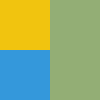

In [2]:
from IPython.display import display
from PIL import Image, ImageDraw

# https://stackoverflow.com/questions/61886436/how-to-draw-using-python
img_sq_1 = Image.new("RGBA", (100, 100))
img_sq_1_draw = ImageDraw.Draw(img_sq_1)
# https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html#PIL.ImageDraw.ImageDraw.rectangle
img_sq_1_draw.rectangle((0, 0, 50, 50), fill=X_RGB)
img_sq_1_draw.rectangle((0, 50, 50, 100), fill=Y_RGB)
img_sq_1_draw.rectangle((50, 0, 100, 100), fill=Z_RGB)
display(img_sq_1)

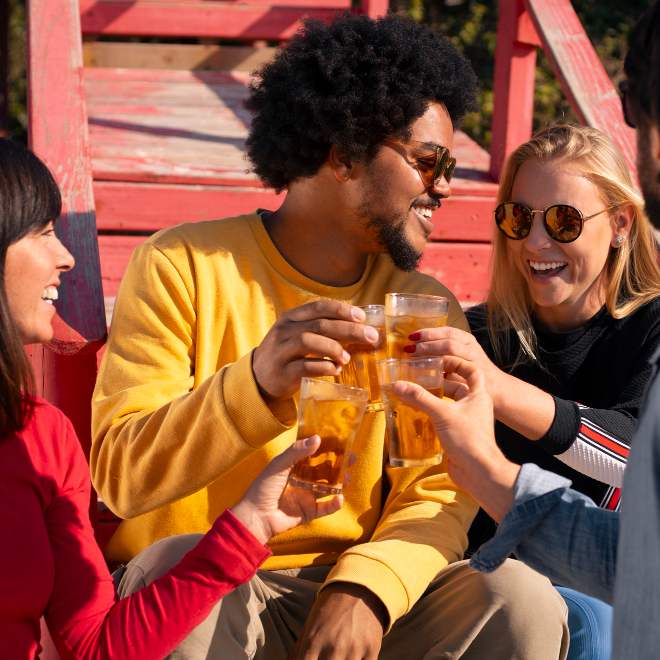

In [3]:
# https://neptune.ai/blog/image-processing-python-libraries-for-machine-learning
import urllib.request
from IPython.display import display
from PIL import Image

# https://www.geeksforgeeks.org/how-to-open-an-image-from-the-url-in-pil/
urllib.request.urlretrieve(img_src, img_dst)

# https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop
# https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook
with Image.open(img_dst) as im:
  im_crop = im.crop(img_LTRB)
  display(im_crop)

## Introductory to Synthetic/Digital Colors

When I say Synthetic or Digital, I came across to a machinary mathematical mixer of colors that come by illusion or render. Which actually I mean how digital RGB fake our eyes that a single dot of color is actually complementary of 3 different LED, or a printable photography colors those render under swipe of a band of ink. Yes, an RGB and CYMK.

![LED](https://garethedwill.wordpress.com/wp-content/uploads/2011/02/sd-lcd.jpg)

An LED of RGB light are foregrounds (cells) on a black screen (base). So if we just want a dark red, we could just decrease the red luminance as low as we wish. In fact, a lot of manufactors are using support light to add dark nuinase or brightening the light. They add a single additional blue light to increase dark or cold, or red light to increase warm, or white light to increase brightness. In conclusion, the cell change its luminocity.

![CMYK](https://printingsolutions.com/wp-content/uploads/2020/12/CMYK_print.jpg)

Complementing LED, the CYMK has different approach. The cells (CYM) on white paper (base) not changing its luminocity, but only decreasing its quantities. To add dark nuance, the black ink itself became support. Remember! This ink mixing are done in the real world, not in a metaphysics.

There are still a lot of others color models need to discover, such as HSL, HWB, HSB, HSV, and Natural Color System (NCS). We need to explore each topic.

Source:
- https://en.wikipedia.org/wiki/Color_model
- https://www.pantone.com/articles/color-fundamentals/color-models-explained

## Subtractive RGB

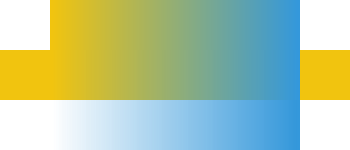

In [4]:
from IPython.display import display, Image as dImage
import math
import cairo
import PIL.Image as Image

(img_w, img_h) = (50 * (1+1+3+1+1), int(50 * 3))

# https://pycairo.readthedocs.io/en/latest/reference/patterns.html#cairo.Gradient.add_color_stop_rgba
# https://pycairo.readthedocs.io/en/latest/reference/patterns.html#class-lineargradient-gradient
# https://pycairo.readthedocs.io/en/latest/tutorial/pillow.html
# https://pycairo.readthedocs.io/en/latest/tutorial/introduction.html
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, img_w, img_h)
ctx = cairo.Context(surface)
ctx.scale(img_w, img_h)

ctx.rectangle(50/img_w, 0, 50*5/img_w, 50/img_h)
pat = cairo.LinearGradient(0.0, 0.0, 1.0, 0.0)
pat.add_color_stop_rgba(0.15, *map(lambda x: x/255, X_RGB), 1)
pat.add_color_stop_rgba(1 - 0.15, *map(lambda x: x/255, Y_RGB), 1)
ctx.set_source(pat)
ctx.fill()

ctx.rectangle(0, 50/img_h, 50*7/img_w, 50/img_h)
# ctx.rectangle(0, 0, 50*7/img_w, 50*2/img_h)
pat_1 = cairo.SolidPattern(*map(lambda x: x/255, X_RGB))
ctx.set_source(pat_1)
ctx.fill()

ctx.rectangle(50/img_w, 50/img_h, 50*5/img_w, 50*2/img_h)
pat_2 = cairo.LinearGradient(0.0, 0.0, 1.0, 0.0)
pat_2.add_color_stop_rgba(0.15, *map(lambda x: x/255, Y_RGB), 0)
pat_2.add_color_stop_rgba(1 - 0.15, *map(lambda x: x/255, Y_RGB), 1)
ctx.set_source(pat_2)
ctx.fill()

im = Image.frombuffer("RGBA", (img_w, img_h), surface.get_data().tobytes(), 'raw', "BGRa", surface.get_stride())
display(im)

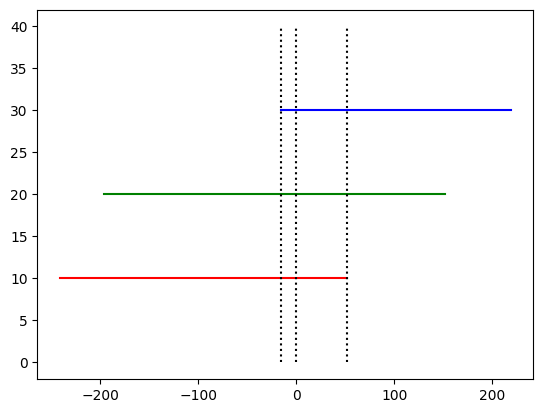

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# https://www.w3schools.com/python/python_ref_functions.asp
# plt.plot(list(map(lambda x: x * -1, X_RGB)), list(map(lambda i: i[0], list(enumerate(X_RGB)))))

R = (X_RGB[0] * -1, Y_RGB[0])
G = (X_RGB[1] * -1, Y_RGB[1])
B = (X_RGB[2] * -1, Y_RGB[2])

plt.plot(R, (10, 10), color='red')
plt.plot(G, (20, 20), color='green')
plt.plot(B, (30, 30), color='blue')

plt.plot((X_RGB[2] * -1, X_RGB[2] * -1), (0,40), linestyle = 'dotted', color='black')
plt.plot((Y_RGB[0], Y_RGB[0]), (0,40), linestyle = 'dotted', color='black')
plt.plot((0,0), (0,40), linestyle = 'dotted', color='black')

# https://docs.jupyter.org/en/latest/
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
# https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
%matplotlib inline
plt.show()

Did you see it? This is the simplest algorithm to blend color. There are 2 ways to implement this:
1. Linear Reduction
2. Alpha Overlaying

Both would have the same conclusion.

## Light, Prism, and RGB

![wavelength](https://405nm.com/wp-content/uploads/2023/04/405nm-laser-optics-122.webp)
![interferece](https://static.sciencelearn.org.nz/images/images/000/004/105/embed/PHYSICS_SOUND_ART_04_Sound_wave_interference_Sine_wave_interference_Wave_addition_v3.jpg?1674173139)

First, let's see these two images. What can you get? The waves have some propertises: amplitude, length, and rotation. And when they interfere one with another, they can create a new wave, strenghten it, or even annihilate one another.

Let's start with basice color subtraction to be a control variable.

Reference:
- https://stackoverflow.com/questions/726549/algorithm-for-additive-color-mixing-for-rgb-values

### Simple Subtraction RGB

How subtraction of 2 RGBs work? Assume both RGBs are vector and we name it X and Y.

In [ ]:
display(im_crop)